UMAP: Uniform Manifold Approximation and Projection

McInnes and Healy 2018
Abstract, paraphrased
- Like t-SNE in that it is for dimension reduction, and has a similar performance.
- Arguments for preserving global structure and improved run time performance



Section 2: Theory underlying the algorithm

General workflow: High dimensional data--> high dimensional representation--> low dimensional representation--> low dimensional data


- Assumes that data is uniformly distributed on manifold, which is true if you use a Riemannian metric
- Makes local manifold approximations--manifolds are like topographical representations
- Simplicial set representations--high-dimensional generalization of directed graphs
- Uses fuzzy instances of these to combine in order to get a unified map.
- Minimizes cross-entropy between representations

From the paper: 
- Geodesic distance can be calculated based on assumptions (PROOF in paper)
- Does local estimations of distance for each ball X_i in the space to k nearest neighbors, converts these into fuzzy simplicial sets then merges them into a consistent structure
- Can optimize using stochastic gradient descent (like t-SNE)



Sample implementation in Python using umap-learn package.

In [125]:
import numpy as np
from sklearn.datasets import load_iris, load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import umap


<module 'umap' from '/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/__init__.py'>


In [123]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [131]:
np.random.seed()

Default parameters:
n_neighbors = 15: Low values leads to a focus on local structure, while large values makes the algorithm look at higher structure and larger areas. Range of 5-50, 10-15 typical.

min_dist : .1. Sensible range is  0.001 to 0.5

n_components: 2 More is ok for dimension reduction, but usually 2 or 3 is used in visualization

distance: not given 

/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


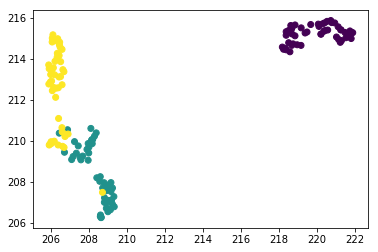

In [138]:
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=.1,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



Testing some different parameter combinations:

/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


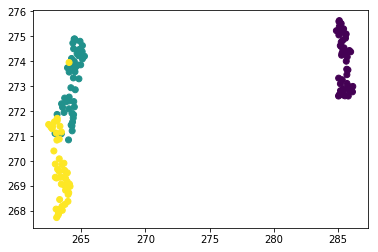

In [139]:
umap_object = umap.UMAP(n_neighbors=30,
        min_dist=.1,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 40 separate connected components using meta-embedding (experimental)
  n_components


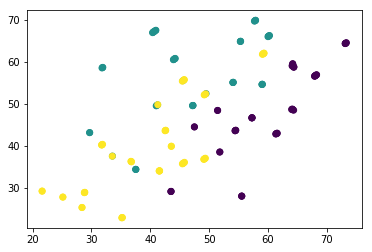

In [140]:
umap_object = umap.UMAP(n_neighbors=2,
        min_dist=.1,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


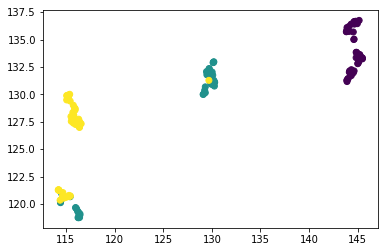

In [137]:
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=0,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


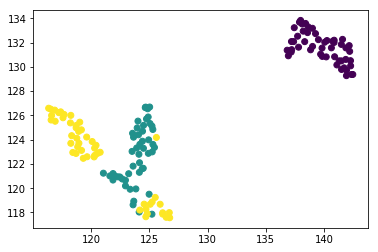

In [110]:
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=0.5,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/metrics/pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)
/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


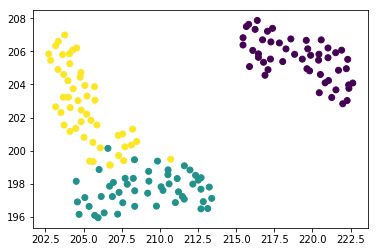

In [142]:
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=0.99,
        n_components=2,
        metric='euclidean')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)



/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


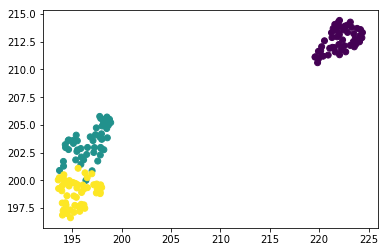

In [143]:
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=0.5,
        n_components=2,
        metric='cosine')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)




In [72]:
import timeit

/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


0.22873716600588523


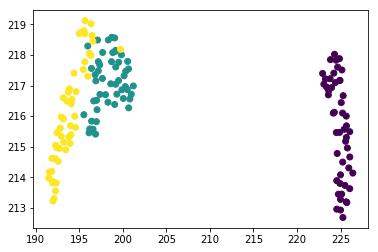

In [144]:
tic=timeit.default_timer()
umap_object = umap.UMAP(n_neighbors=15,
        min_dist=0.5,
        n_components=2,
        metric='chebyshev')
embedding = umap_object.fit_transform(iris.data)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)
toc=timeit.default_timer()

print(toc-tic)

/Users/emilygrabowski/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


1.9610340950021055


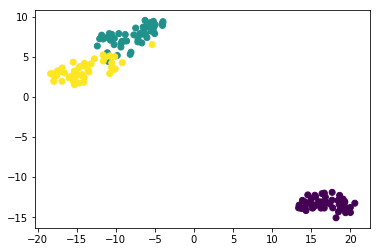

In [145]:
from sklearn.manifold import TSNE
tic=timeit.default_timer()


tsne_object = TSNE()
embedding = tsne_object.fit_transform(iris_df)
embedding.shape
plt.scatter(embedding[:, 0], embedding[:, 1],c=iris.target)

toc=timeit.default_timer()

print(toc-tic)


UMAP is claimed to be better than tSNE for clustering purposes because it creates more meaningful clusters and preserves internal structure of the clusters more. However clustering methods like DBSCAN are suggested over K-means because the data will not be spherical.

From the GitHub:
    
" UMAP has a few signficant wins in its current incarnation.

- First of all UMAP is fast. It can handle large datasets and high dimensional data without too much difficulty, scaling beyond what most t-SNE packages can manage.

- Second, UMAP scales well in embedding dimension -- it isn't just for visualisation! You can use UMAP as a general purpose dimension reduction technique as a preliminary step to other machine learning tasks. With a little care (documentation on how to be careful is coming) it partners well with the hdbscan clustering library.

- Third, UMAP often performs better at preserving aspects of global structure of the data than t-SNE. This means that it can often provide a better "big picture" view of your data as well as preserving local neighbor relations.

- Fourth, UMAP supports a wide variety of distance functions, including non-metric distance functions such as cosine distance and correlation distance. You can finally embed word vectors properly using cosine distance!

- Fifth, UMAP supports adding new points to an existing embedding via the standard sklearn transform method. This means that UMAP can be used as a preprocessing transformer in sklearn pipelines.

- Sixth, UMAP supports supervised and semi-supervised dimension reduction. This means that if you have label information that you wish to use as extra information for dimension reduction (even if it is just partial labelling) you can do that -- as simply as providing it as the y parameter in the fit method.

- Finally UMAP has solid theoretical foundations in manifold learning (see our paper on ArXiv). This both justifies the approach and allows for further extensions that will soon be added to the library (embedding dataframes etc.)."



Sources:

Main paper: UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction by McInnes and Healy. https://arxiv.org/pdf/1802.03426.pdf

Main Tutorial: https://umap-learn.readthedocs.io/en/latest/how_umap_works.html Very thorough! A lot of my iris example is taken from here.


GitHub Website: https://github.com/lmcinnes/umap